In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split

Os exemplos abaixo aplicam PCA em dados sintéticos de forma a obter um resultado
com clusters linearmente separáveis.

### Exemplo linearmente separável

Neste primeiro exemplo, temos dados já linearmente separáveis.

Por isso, espera-se que o PCA simplesmente mantenha essa característica.

Lembrando que a coloração do dataset é apenas para indicar os clusters que desejamos ver separados.
O PCA opera sobre a matriz $X$ de dados, sem nenhuma informação adicional.

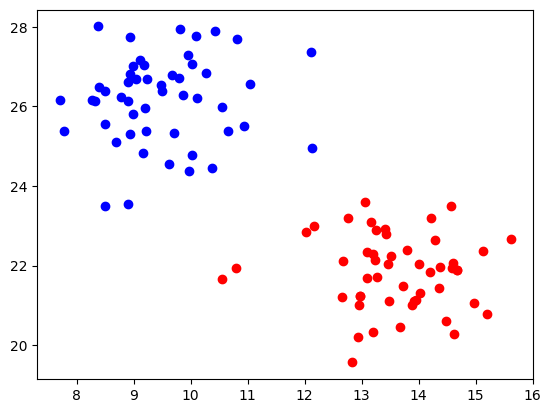

In [12]:
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 30), random_state=6661)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'ro')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo')
plt.show()

#### PCA

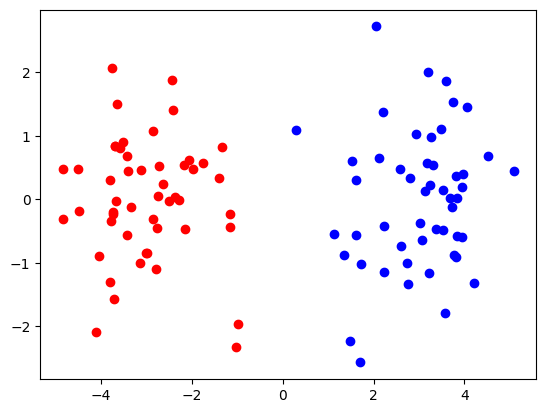

In [13]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
plt.plot(X_pca[:, 0][y == 0], X_pca[:, 1][y == 0], 'ro')
plt.plot(X_pca[:, 0][y == 1], X_pca[:, 1][y == 1], 'bo')
plt.show()

#### Kernel PCA com kernel polinomial de grau 3

$$k(x, y) = (x \cdot y)^3$$

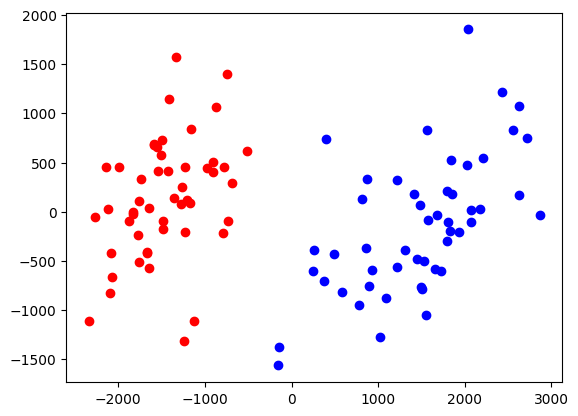

In [14]:
kpca = KernelPCA(n_components=2, kernel='poly', degree=3)
kpca.fit(X)
X_kpca = kpca.transform(X)
plt.plot(X_kpca[:, 0][y == 0], X_kpca[:, 1][y == 0], 'ro')
plt.plot(X_kpca[:, 0][y == 1], X_kpca[:, 1][y == 1], 'bo')
plt.show()

### Exemplo não linearmente separável

O PCA pode ser visto como uma transformação linear.
Não espera-se, portanto, que ele consiga transformar componentes não-linearmente separáveis em linearmente separáveis.

A ideia do Kernel PCA é avaliar a similaridade entre dois pontos, que aqui chamarei de $x$ e $y$,
de uma outra forma que não a matriz de covariância do PCA tradicional.

Ao invés dela, utiliza-se o chamado "kernel trick", no qual uma função arbitrária é utilizada
para definir um espaço de produto interno para quais os dados serão transformados.

É **nesse espaço**, que pode ser de altíssima dimensão, que a operação de separação dos dados será feita,
ainda seguindo a similaridade entre dois pontos, que é simplesmente o produto interno entre eles.

A função escolhida é chamada de kernel, e portanto o nome kernel PCA.

**Fonte:** https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html

In [15]:
X2, y2 = datasets.make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=6661)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, stratify=y2, random_state=0)

In [17]:
pca2 = PCA(n_components=2)
# poly deu matriz mal condicionada
kernel_pca2 = KernelPCA(
    n_components=None, kernel="rbf", gamma=10
)

X_test_pca = pca2.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca2.fit(X_train).transform(X_test)

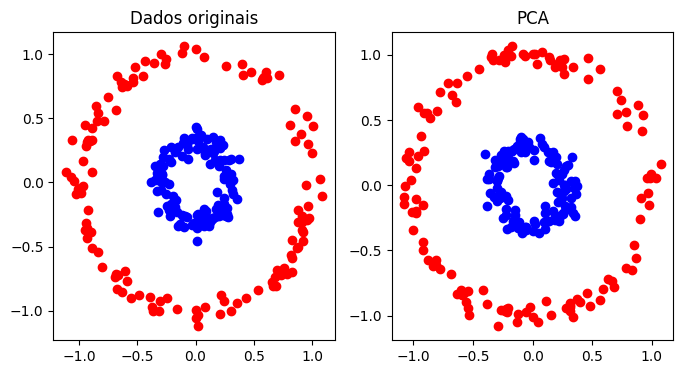

In [30]:
# plot
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("Dados originais")
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color="red")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color="blue")
plt.subplot(122)
plt.title("PCA")
plt.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], color="red")
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], color="blue")
plt.show()

Usando o kernel de funções de base radiais

$$k(x, y) = \exp \left( - \frac{||x - y||^2_2}{2 \sigma} \right)$$

($\sigma$ arbitrário)

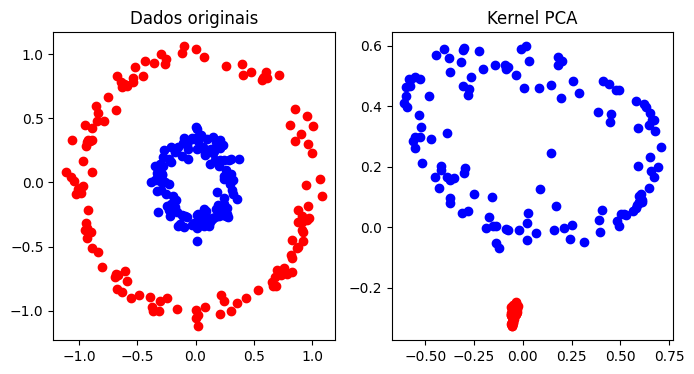

In [47]:
# plot
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("Dados originais")
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color="red")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color="blue")
plt.subplot(122)
plt.title("Kernel PCA")
plt.scatter(X_test_kernel_pca[y_test == 0, 0], X_test_kernel_pca[y_test == 0, 1], color="red")
plt.scatter(X_test_kernel_pca[y_test == 1, 0], X_test_kernel_pca[y_test == 1, 1], color="blue")
plt.show()